Show crude rate grouped by, and add some analysis: 
* Gender - jared.sarabia@gmail.com
* Socioeconomic group - jared.sarabia@gmail.com
* Race - curtis.robords@gmail.com
* Age Groups - jared.sarabia@gmail.com
* Time series of different codes - Goal is to show why we are focusing on Fentanyl: curtis.robords@gmail.com
  * Talk about correlation vs. causation caveat


In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [41]:
cleaned = pd.read_csv('cleaned_wonder.csv')

In [42]:
cleaned.head(2)

,Multiple Cause of death,Multiple Cause of death Code,Year,Year Code,Gender,Gender Code,Race,Race Code,Five-Year Age Groups,Five-Year Age Groups Code,Deaths,Population,Crude Rate,socioec quintile
0,Opium,T40.0,2001,2001,Female,F,White,2106-3,40-44 years,40-44,5,1783717,0.280314,1
1,Opium,T40.0,2003,2003,Female,F,Black or African American,2054-5,25-29 years,25-29,5,330059,1.514881,1


In [43]:
cleaned.dtypes

Multiple Cause of death          object
Multiple Cause of death Code     object
Year                              int64
Year Code                         int64
Gender                           object
Gender Code                      object
Race                             object
Race Code                        object
Five-Year Age Groups             object
Five-Year Age Groups Code        object
Deaths                            int64
Population                        int64
Crude Rate                      float64
socioec quintile                  int64
dtype: object

## Time series of different codes

Why we focus on Fentanyl:

Fentanyl, categorized under "Other synthetic narcotics", has skyrocketed as a COD since 2015:

In [44]:
cleaned['Year'].unique()

array([2001, 2003, 2004, 2006, 2012, 2013, 2016, 2017, 2018, 2019, 2020,
       1999, 2000, 2002, 2005, 2007, 2008, 2009, 2010, 2011, 2014, 2015])

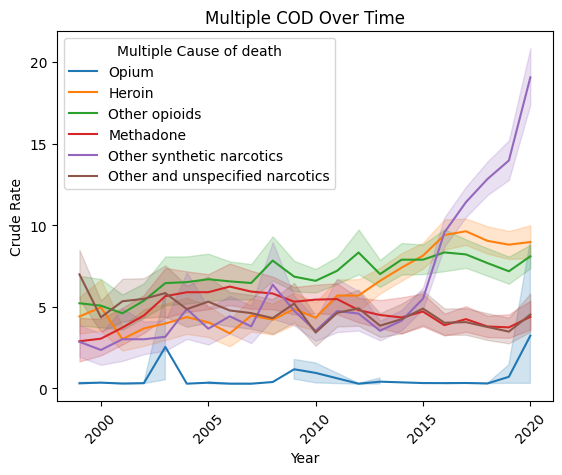

In [45]:
# Sum of Deaths over time
COD_Code = sns.lineplot(data=cleaned, x='Year', y='Crude Rate', hue='Multiple Cause of death')

for item in COD_Code.get_xticklabels():
    item.set_rotation(45)
title = 'Multiple COD Over Time'

COD_Code.set(title=title)

# save the plot as PNG file
plt.savefig(f"{title}.svg", format='svg', bbox_inches="tight")

In [46]:
fentanyl = cleaned[cleaned['Multiple Cause of death'] == 'Other synthetic narcotics']

### Crude Rate by Race

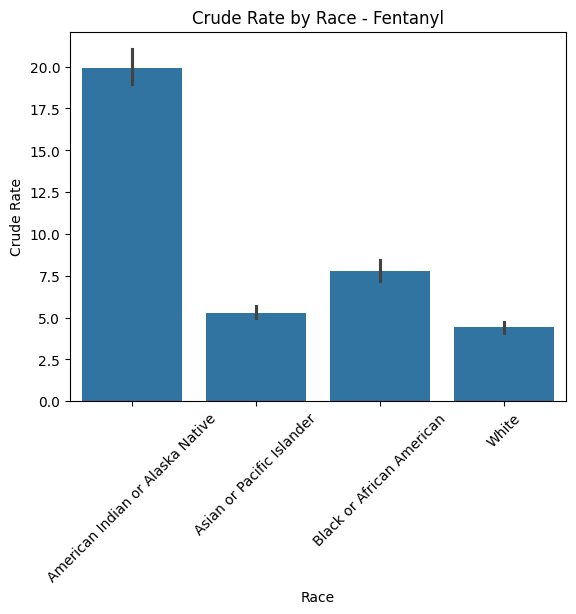

In [47]:
race_plot = sns.barplot(data=fentanyl, x='Race', y='Crude Rate')

for item in race_plot.get_xticklabels():
    item.set_rotation(45)
title = 'Crude Rate by Race - Fentanyl'

race_plot.set(title=title)

# save the plot as PNG file
plt.savefig(f"{title}.svg", format='svg', bbox_inches="tight")


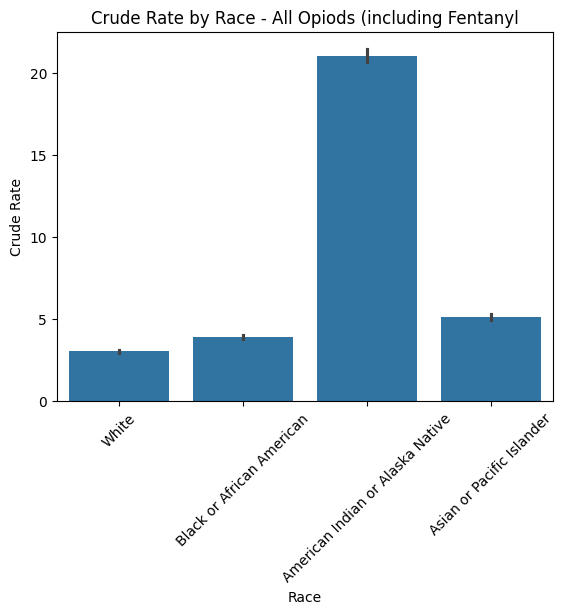

In [48]:
race_plot = sns.barplot(data=cleaned, x='Race', y='Crude Rate')

for item in race_plot.get_xticklabels():
    item.set_rotation(45)
title = 'Crude Rate by Race - All Opiods (including Fentanyl'

race_plot.set(title=title)

# save the plot as PNG file
plt.savefig(f"{title}.svg", format='svg', bbox_inches="tight")

## Why do we need to "smooth out" our predictions?

The raw count, or crude rate of deaths, across different groups is highly variable, where the crude rate can be very sensitive to just a few extra deaths.  There are two problems the team is looking to solve with a model: 1) a predictive model will ensure the government is more proactive, rather than reactive and 2) modeled estimates are much more stable.  This will ensure funding is allocated in a more stable manner.

In [49]:
# Calculate the variance of crude rate
df['Crude Rate'].var()

NameError: name 'df' is not defined